<a href="https://colab.research.google.com/github/kok554/2024-1-BDA/blob/main/inclass/11w_0527_mon_A_ch10_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


## 코랩에서 한글 처리

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 9.5 MB/s eta 0:00:00


## 그래프 설정

In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [5]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [6]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

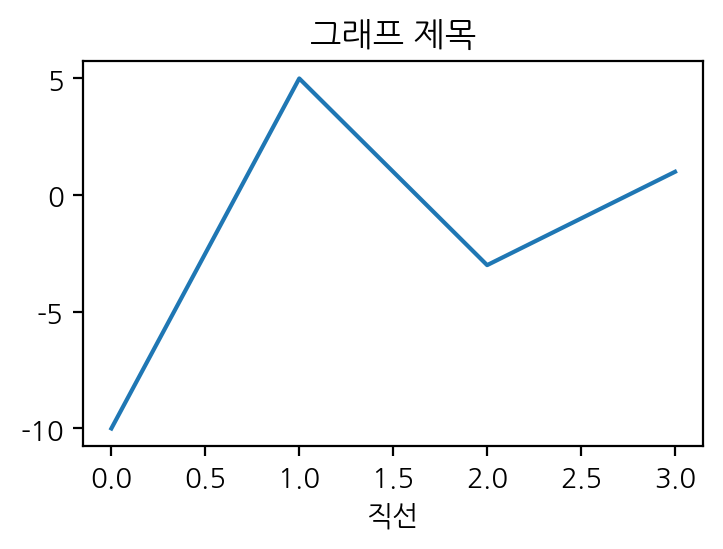

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

In [8]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 46 (delta 7), reused 7 (delta 1), pack-reused 0
Receiving objects: 100% (46/46), 4.59 MiB | 6.37 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [9]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


## 한국어 텍스트 처리 준비

In [29]:
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /usr/local/lib/python3.10/dist-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [11]:

!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 3.0 MB/s eta 0:00:00


In [12]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.3
Summary: A little word cloud generator
Home-page: 
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [13]:
# 워드 클라우드 설치
!pip install wordcloud

In [14]:
# colab 리눅스에 나눔 폰트 설치
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [15]:
# 폰트 확인
!ls /usr/share/fonts/truetype/nanum/NanumGothic.ttf

/usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [16]:
#  폰트 파일 이름 저장
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

## 10 텍스트 마이닝

## 10-1 대통령 연설문 텍스트 마이닝

## 가장 많이 사용된 단어 알아보기

1. 연설문 불러오기

In [17]:
!ls -al data/speech_moon.txt

-rw-r--r-- 1 root root 22207 Jun 10 13:33 data/speech_moon.txt


In [18]:
moon = open('data/speech_moon.txt', encoding = 'UTF-8').read()
moon

'정권교체 하겠습니다!\n  정치교체 하겠습니다!\n  시대교체 하겠습니다!\n  \n  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.\n\n그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치로 불러냈습니다. 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다. 이제 저는 국민과 함께 높이 날고 크게 울겠습니다. 오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.\n\n\n‘우리나라 대통령’이 되겠습니다.\n\n\n존경하는 국민 여러분!\n  \n  저는 대통령이 되겠습니다. 우리나라 대통령이 되겠습니다. 소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.\n\n지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다. 나라의 주인으로 행세하지 못했고, 주인으로 대접받지 못했습니다. 나서서 말도 하지 못했습니다. 이제 몸을 일으켜 날아야 합니다. 당당하게 말하고 정치에 참여해야 합니다.\n\n제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다. 저는 시민과 동행하는 정치를 하고 싶습니다. 제가 추구하는 ‘우리나라’는 특권과 불평등의 나라가 아니라, 보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다.\n\n이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다. 힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제, 낡은 정치, 낡은 권력도 모두 끝났습니다. 오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다.\n\n국민이 모두 아픕니다.\n\n제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고, 우리가 처한 현실이 너무도 엄중

2. 불필요한 문자 제거하기

In [19]:
import re
moon = re.sub('[^가-힣]', '',moon)
moon

'정권교체하겠습니다정치교체하겠습니다시대교체하겠습니다불비불명이라는고사가있습니다남쪽언덕나뭇가지에앉아년동안날지도울지도않는새그러나그새는한번날면하늘끝까지날고한번울면천지를뒤흔듭니다그동안정치와거리를둬왔습니다그러나암울한시대가저를정치로불러냈습니다더이상남쪽나뭇가지에머무를수없었습니다이제저는국민과함께높이날고크게울겠습니다오늘저는제대대통령선거출마를국민앞에엄숙히선언합니다우리나라대통령이되겠습니다존경하는국민여러분저는대통령이되겠습니다우리나라대통령이되겠습니다소수특권층의나라가아니라보통사람들이주인인우리나라네편내편편가르지않고함께가는우리나라우리라는말이조금도부끄럽지않은진정한우리나라의대통령이되겠습니다지금까지우리보통사람들은날지도울지도못하는새였습니다나라의주인으로행세하지못했고주인으로대접받지못했습니다나서서말도하지못했습니다이제몸을일으켜날아야합니다당당하게말하고정치에참여해야합니다제가추구하는우리나라는정치인에게맡겨놓는나라가아니라시민이직접정치와정책과정에참여하는나라입니다저는시민과동행하는정치를하고싶습니다제가추구하는우리나라는특권과불평등의나라가아니라보통사람들이함께기회를가지는공평하고정의로운나라입니다이제권력과돈을가진집단이나라를그들마음대로움직이던시대는끝났습니다힘없는사람들에게끝없이희생을강요하던낡은경제낡은정치낡은권력도모두끝났습니다오늘저문재인은우리나라를우리모두의나라로선언합니다국민이모두아픕니다제가높이날고크게울겠다고결심한이유는보통사람들의삶이너무고달프고우리가처한현실이너무도엄중하기때문입니다근본적인혁신거대한전환없이는나라가무너지겠구나하는절박함때문입니다지금우리의삶은어떻습니까우리사회는더이상경제성장의과실을나눠갖지않습니다소수의부유층과대기업의창고는황금으로가득차지만대부분보통사람들은취업불안주거불안고용불안건강불안노후불안등불안을이불처럼덮고매일잠자리에들어야합니다국민한사람한사람이모두아픕니다빚갚기힘들어서아이키우기힘들어서일자리가보이지않아서아픕니다입시부담과성적스트레스그리고학교폭력에상처받은어린영혼들은그아픔을견디지못하고하나둘우리곁을떠나고있습니다어르신들도삶이힘겨워서스스로세상을버리는분이많습니다왜이렇게아픈일들이계속일어날까요약자의고통에관심없는정부부자와강자의기득권지켜주기에급급한정치가사람

In [20]:
dm = open('data/speech_moon.txt', encoding = 'UTF-8').read()
dm
d = re.sub('[가-힣]', ' ', dm)
d

'          !\n            !\n            !\n  \n  ‘    (不飛不鳴)’            .               , 3                 .                         ,                .\n\n                   .                          .                          .                            .        18                           .\n\n\n‘        ’       .\n\n\n           !\n  \n               .                .                            ‘    ’,                           , ‘  ’                 ,     ‘    ’            .\n\n                                .                  ,                .                .                  .                      .\n\n        ‘    ’                                                .                        .         ‘    ’                  ,                                  .\n\n                                           .                             ,      ,                .                                 .\n\n           .\n\n                                          ,                  

In [21]:
from konlpy.tag import Hannanum
hannanum = Hannanum()
print(hannanum.nouns(u'다람쥐 헌 쳇바퀴에 타고파'))

['다람쥐', '쳇바퀴', '타고파']


In [30]:
import konlpy
hannanum = konlpy.tag.Hannanum()

In [31]:
hannanum.nouns("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '영토', '한반도', '부속도서']

In [33]:
nouns = hannanum.nouns(moon)

In [34]:
type(nouns)

list

In [35]:
len(nouns)

40

In [36]:
nouns[-10:]

['저', '저', '대대통령', '선거', '출마', '국민', '앞', '선언', '우리나라', '대통령']

In [37]:
import pandas as pd
df_word = pd.DataFrame({'word':nouns})
df_word

,word
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사
5,남쪽
6,언덕
7,나뭇가지
8,년
9,동안


In [38]:
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
5,남쪽,2
6,언덕,2
7,나뭇가지,4
8,년,1
9,동안,2


In [39]:
df_word[df_word['count'] >= 2]

,word,count
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
5,남쪽,2
6,언덕,2
7,나뭇가지,4
9,동안,2
11,한번,2


In [40]:
df_word.query('count >= 2')

,word,count
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
5,남쪽,2
6,언덕,2
7,나뭇가지,4
9,동안,2
11,한번,2


In [41]:
df_word[df_word['count'] == 1]

,word,count
8,년,1
10,새,1
13,끝,1
21,저,1
26,수,1
27,저,1
30,저,1
31,저,1
36,앞,1


In [43]:
df_word = df_word.query('count >= 2')
df_word.sort_values('count')

,word,count
18,거리,2
20,시대,2
24,남쪽,2
28,국민,2
17,정치,2
29,오늘,2
15,천지,2
14,한번,2
12,하늘,2
11,한번,2


In [44]:
df_word = df_word.groupby('word', as_index =False)\
                  .agg(n=('word','count')) \
                  .sort_values('n',ascending=False)

df_word

,word,n
25,한번,2
2,국민,2
4,나뭇가지,2
5,남쪽,2
20,정치,2
15,언덕,1
24,하늘,1
23,출마,1
22,천지,1
21,정치교체,1


In [45]:
top20 = df_word.head(20)
top20

,word,n
25,한번,2
2,국민,2
4,나뭇가지,2
5,남쪽,2
20,정치,2
15,언덕,1
24,하늘,1
23,출마,1
22,천지,1
21,정치교체,1


In [46]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})           # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [6, 4]})      # 그림 크기, 기본값 [6, 4], 전역 설정

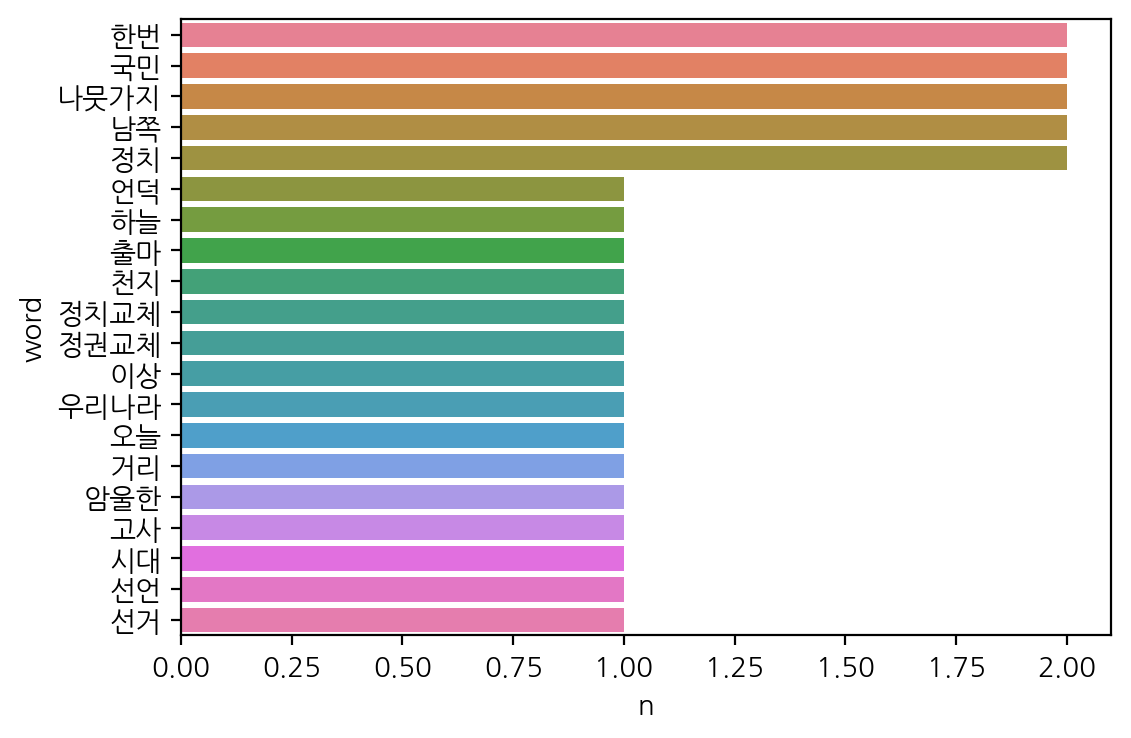

In [48]:
import seaborn as sns

sns.barplot(data= top20, x='n', y='word', hue='word');

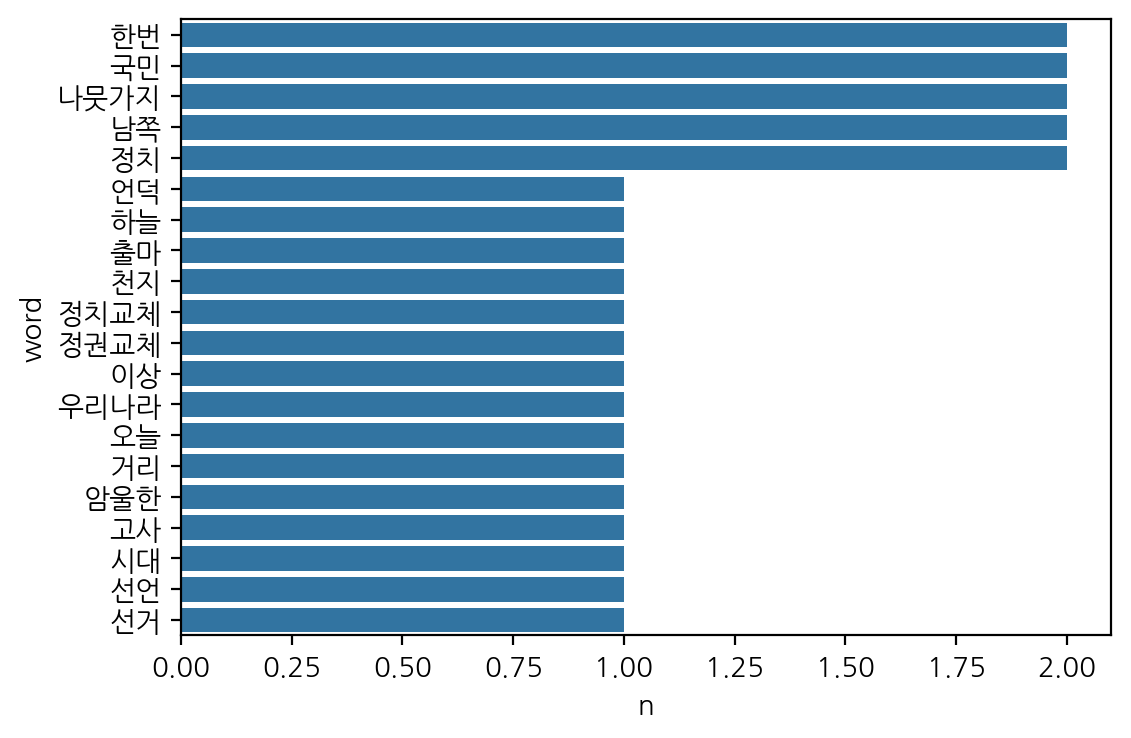

In [49]:
sns.barplot(data = top20, y = 'word', x = 'n');

## 워드 클라우드 만들기

In [50]:
# PC에서 실행 시
font = 'DoHyeon-Regular.ttf'

In [51]:
df_word.head()

,word,n
25,한번,2
2,국민,2
4,나뭇가지,2
5,남쪽,2
20,정치,2


In [52]:
df_word.set_index('word')

,n
word,
한번,2
국민,2
나뭇가지,2
남쪽,2
정치,2
언덕,1
하늘,1
출마,1
천지,1


In [53]:
df_word

,word,n
25,한번,2
2,국민,2
4,나뭇가지,2
5,남쪽,2
20,정치,2
15,언덕,1
24,하늘,1
23,출마,1
22,천지,1
21,정치교체,1


In [56]:
mydf = pd.DataFrame({'col1':[1,2], 'col2':[0.5,0.75]}, index=['row1','row2'])
mydf

,col1,col2
row1,1,0.50
row2,2,0.75


In [57]:
mydf.to_dict()

{'col1': {'row1': 1, 'row2': 2}, 'col2': {'row1': 0.5, 'row2': 0.75}}

In [58]:
df_word.set_index('word').to_dict()

{'n': {'한번': 2,
  '국민': 2,
  '나뭇가지': 2,
  '남쪽': 2,
  '정치': 2,
  '언덕': 1,
  '하늘': 1,
  '출마': 1,
  '천지': 1,
  '정치교체': 1,
  '정권교체': 1,
  '이상': 1,
  '우리나라': 1,
  '오늘': 1,
  '거리': 1,
  '암울한': 1,
  '고사': 1,
  '시대': 1,
  '선언': 1,
  '선거': 1,
  '불비불명': 1,
  '동안': 1,
  '대통령': 1,
  '대대통령': 1,
  '그동안': 1,
  '시대교체': 1}}

In [61]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'한번': 2,
 '국민': 2,
 '나뭇가지': 2,
 '남쪽': 2,
 '정치': 2,
 '언덕': 1,
 '하늘': 1,
 '출마': 1,
 '천지': 1,
 '정치교체': 1,
 '정권교체': 1,
 '이상': 1,
 '우리나라': 1,
 '오늘': 1,
 '거리': 1,
 '암울한': 1,
 '고사': 1,
 '시대': 1,
 '선언': 1,
 '선거': 1,
 '불비불명': 1,
 '동안': 1,
 '대통령': 1,
 '대대통령': 1,
 '그동안': 1,
 '시대교체': 1}

## 4. 워드 클라우드 만들기

In [62]:
# 폰트 확인
!ls /usr/share/fonts/truetype/nanum/NanumGothic.ttf

/usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [63]:
#  폰트 파일 이름 저장
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

In [64]:
!ls /usr/share/fonts/truetype/nanum

NanumBarunGothicBold.ttf	NanumGothicEcoR.ttf	       NanumPen.ttf
NanumBarunGothicLight.ttf	NanumGothicEco.ttf	       NanumSquare_acB.ttf
NanumBarunGothic.ttf		NanumGothicExtraBold.ttf       NanumSquare_acEB.ttf
NanumBarunGothicUltraLight.ttf	NanumGothicLight.ttf	       NanumSquare_acL.ttf
NanumBarunGothic-YetHangul.ttf	NanumGothic.ttf		       NanumSquare_acR.ttf
NanumBarunpenB.ttf		NanumMyeongjoBold.ttf	       NanumSquareB.ttf
NanumBarunpenR.ttf		NanumMyeongjoEcoBold.ttf       NanumSquareEB.ttf
NanumBrush.ttf			NanumMyeongjoEcoExtraBold.ttf  NanumSquareL.ttf
NanumGothicBold.ttf		NanumMyeongjoEcoR.ttf	       NanumSquareRoundB.ttf
NanumGothicCodingBold.ttf	NanumMyeongjoEco.ttf	       NanumSquareRoundEB.ttf
NanumGothicCoding.ttf		NanumMyeongjoExtraBold.ttf     NanumSquareRoundL.ttf
NanumGothicEcoBold.ttf		NanumMyeongjo.ttf	       NanumSquareRoundR.ttf
NanumGothicEcoExtraBold.ttf	NanumMyeongjo-YetHangul.ttf    NanumSquareR.ttf


In [65]:
#  폰트 파일 이름 저장
# FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

In [66]:
# wc 만들기
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = FONT_PATH,       # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               # background_color = 'white')  # 배경색
               background_color = 'pink')  # 배경색

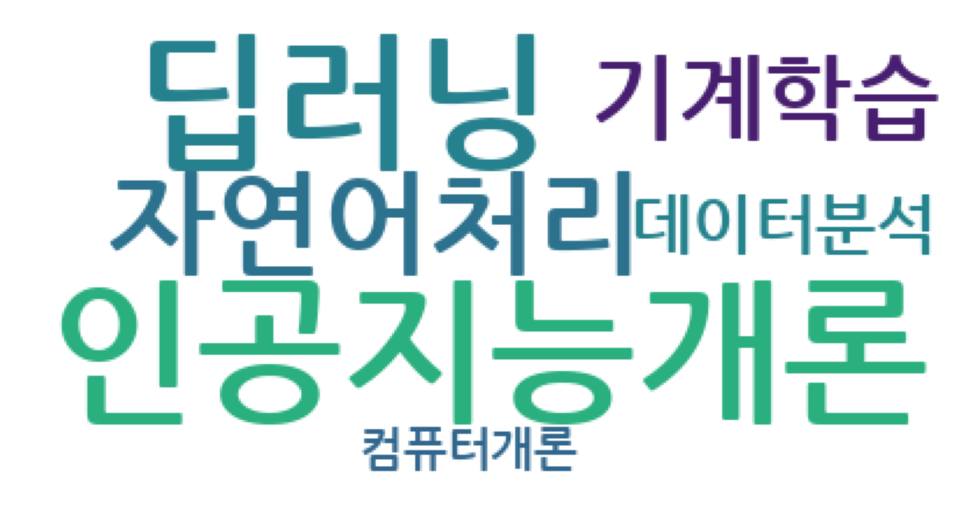

In [67]:
from wordcloud import WordCloud
wc = WordCloud(font_path = FONT_PATH, width = 400, height = 200, background_color = 'white')

import matplotlib.pyplot as plt
plt.axis('off')                 # 테두리 선 없애기
my_dicword = {'인공지능개론': 50, '기계학습': 25, '딥러닝': 45, '데이터분석': 25, '자연어처리': 40, '컴퓨터개론': 10 }
plt.imshow(wc.generate_from_frequencies(my_dicword));

## 워드 클라우드 모양 바꾸기

1. mask 만들기

In [68]:
# [PIL: Python Imaging Library](https://pillow.readthedocs.io/en/stable)
import PIL
icon = PIL.Image.open('data/cloud.png')

In [69]:
icon.size

(825, 467)

In [70]:
import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon) # img에 icon을 복사 (이미지, 위치)가 필요
img = np.array(img)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
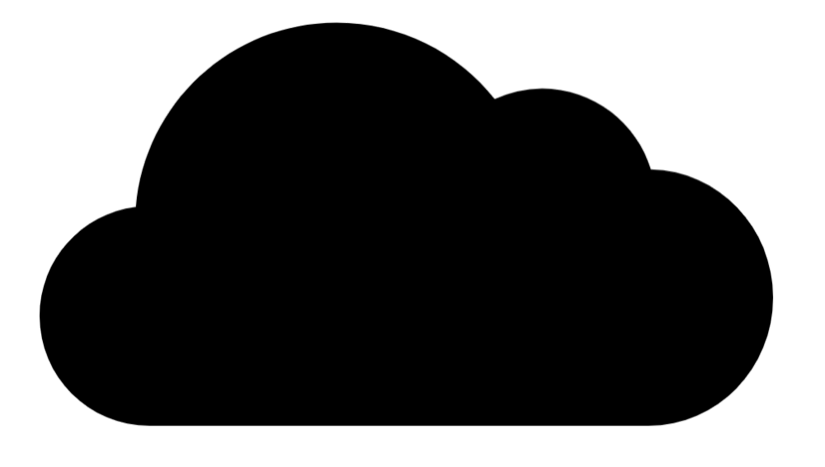

In [71]:
img

2. 워드 클라우드 만들기

In [72]:
# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = FONT_PATH,       # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)                  # mask 설정

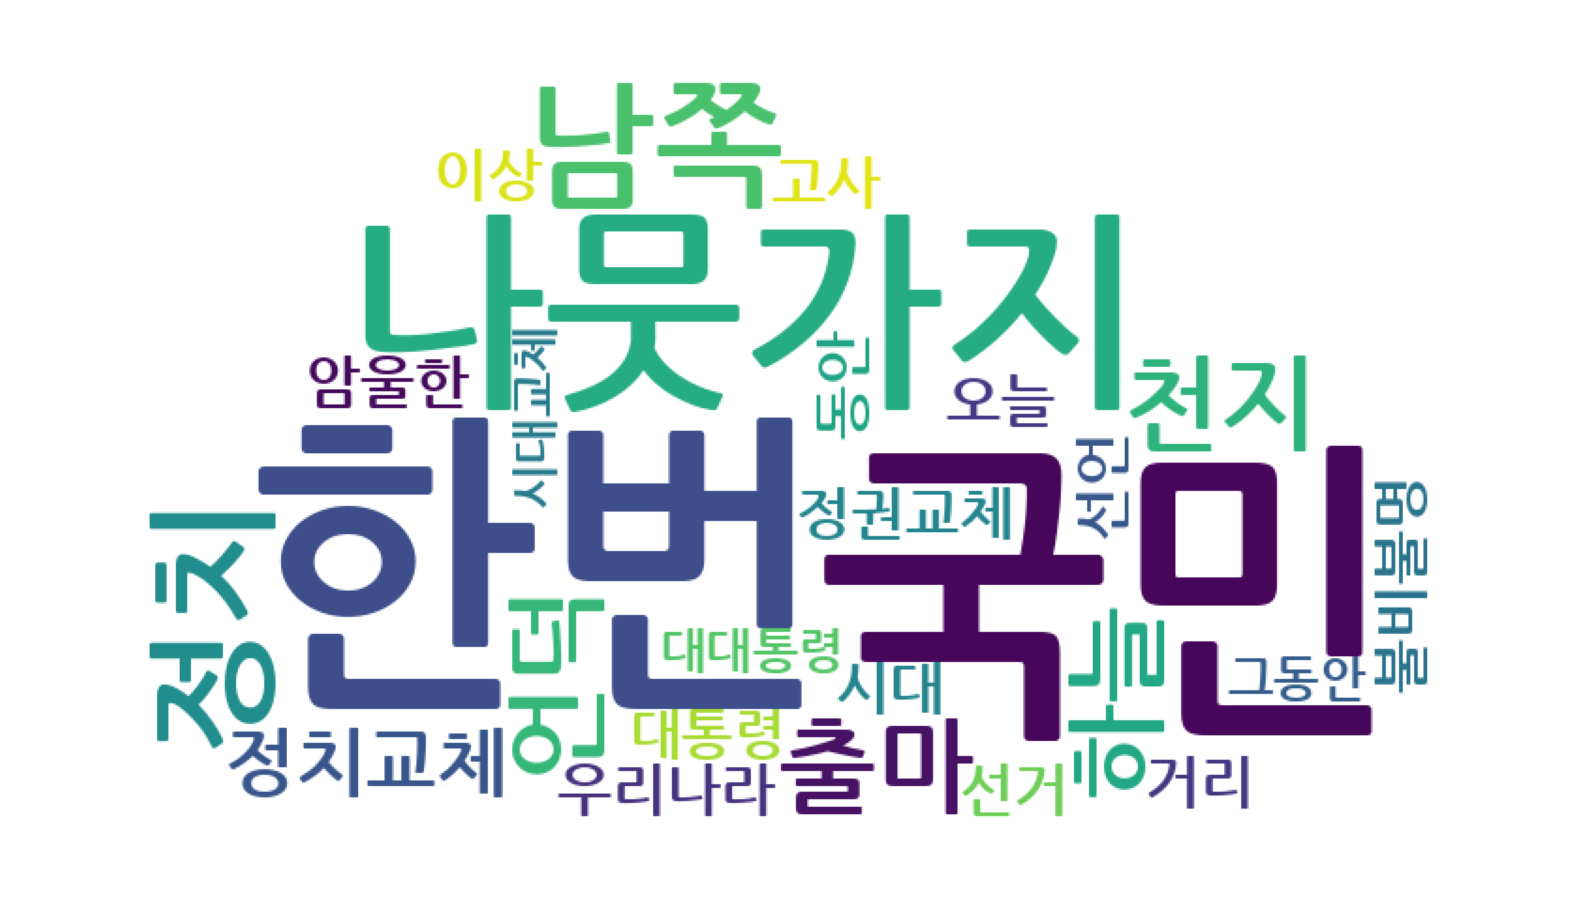

In [73]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud);       # 워드 클라우드 출력

## 워드 클라우드 색깔 바꾸기

In [74]:
# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = FONT_PATH,       # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img,                  # mask 설정
               colormap = 'plasma')
            #    colormap = 'inferno')        # 컬러맵 설정

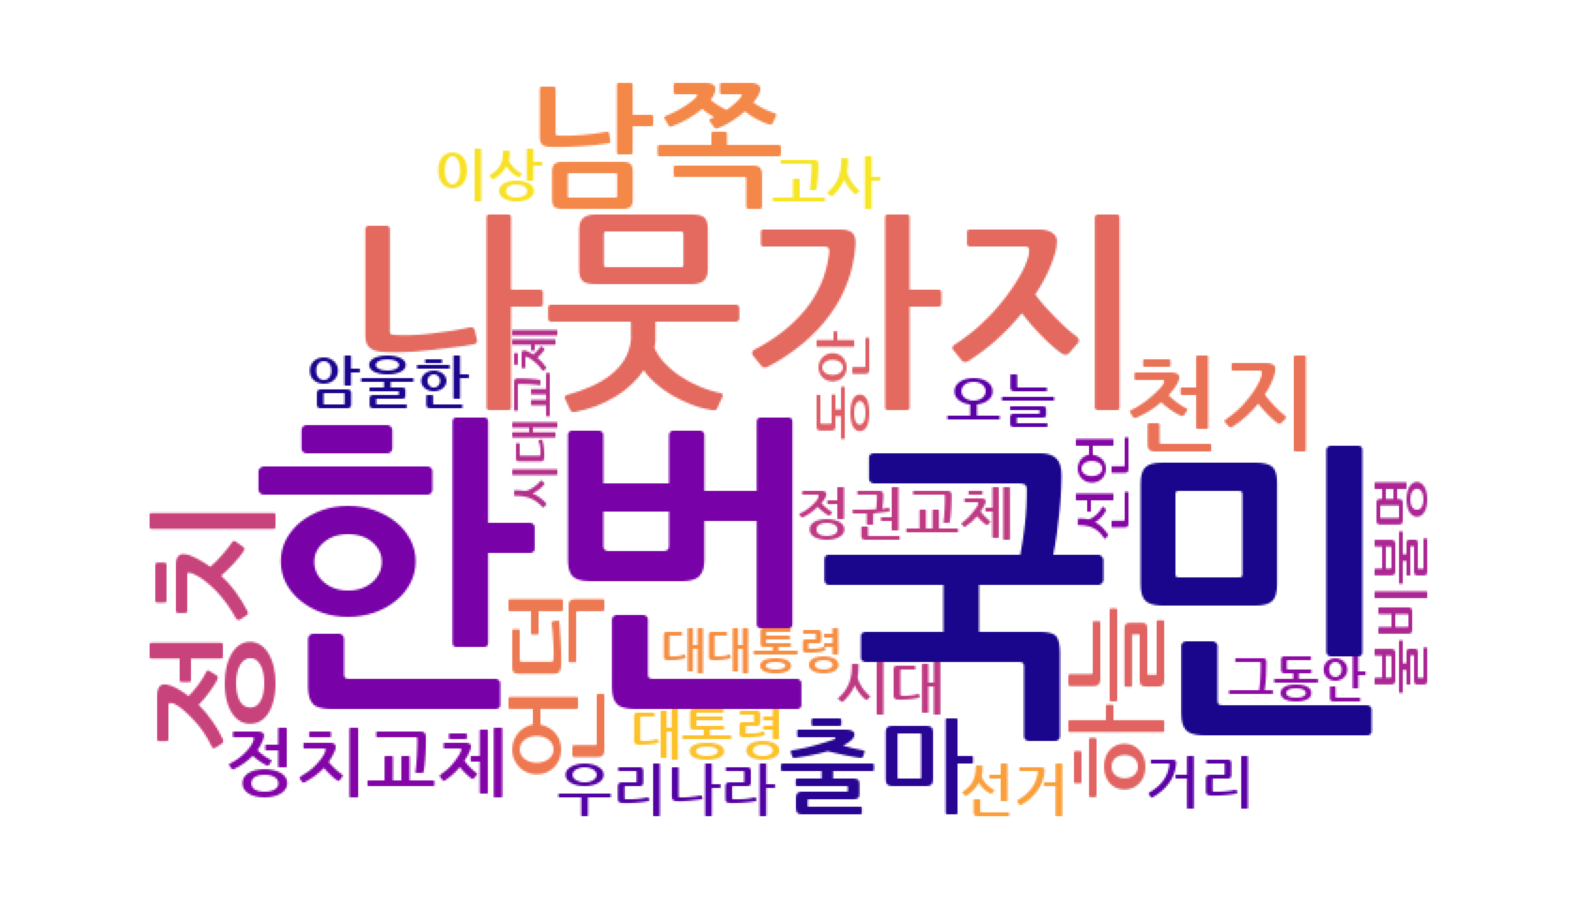

In [75]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud);      # 워드 클라우드 출력

## 기사 댓글 텍스트 마이닝

가장 많이 사용된 단어 알아보기

In [76]:
df = pd.read_csv('data/news_comment_BTS.csv',encoding='UTF-8')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [79]:
df.head()

,reg_time,reply,press,title,url
0,2020-09-01 22:58:09,국보소년단<U+0001F49C>,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
1,2020-09-01 09:56:46,아줌마가 들어도 좋더라,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
2,2020-09-01 09:08:06,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
3,2020-09-01 08:52:32,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
4,2020-09-01 08:36:33,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요",한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...


In [80]:
df['reply'][:10]

0                                    국보소년단<U+0001F49C>
1                                         아줌마가 들어도 좋더라
2    팩트체크\n\n현재 빌보드 HOT 100\n\n1위  방탄소년단[BTS]\n2위 C...
3              방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4                  대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요
5                        정국오빠 생일과 더불어 빌보드 1위기사라니ㅠㅠ축제구나
6    정말 축하하고 응원하지만\n집에서 여러 계정으로 스트리밍 돌리고 사재기하고 다른 팬...
7                         기자는 자고 일어났지만, 팬들은 못자고 발표 기다림
8                                자랑스럽다!!!!!! 축하합니다!!!!
9                                 SuperM 늘 응원하고 사랑합니다~
Name: reply, dtype: object

In [81]:
df[['reply']]

,reply
0,국보소년단<U+0001F49C>
1,아줌마가 들어도 좋더라
2,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요"
...,...
1195,역시!!!!!!!!!!!!
1196,우리 탄이들 너무 자랑스럽고\n사랑해<U+0001F49C><U+0001F49C><U...
1197,이런애들 꼭 군대를 보내 는게 맞을까요
1198,군면제급이다 이건


2. 불필요한 문자 제거하기

In [82]:
df['reply'] = df['reply'].str.replace('[^가-힣]','', regex=True)
df['reply'].head()

0                             국보소년단
1                        아줌마가들어도좋더라
2          팩트체크현재빌보드위방탄소년단위위위위위위위위위
3    방탄소년단이한국사람이라너무자랑스러워요우리오래오래함께하자
4              대단한월드클래스는다르네좋은소식응원해요
Name: reply, dtype: object

3. 명사 추출하기

In [83]:
import konlpy
kkma = konlpy.tag.Kkma()

In [84]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))
pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['네, 안녕하세요.', '반갑습니다.']
['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']


In [85]:
nouns = df['reply'].apply(kkma.nouns)
nouns

0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2       [위, 팩트, 방탄, 소년, 팩트체크, 소년단위, 위위위위, 체크, 보드, 단위, ...
3                     [방탄, 한국, 자랑, 소년단, 한국사람, 사람, 우리, 하자]
4                                 [월드, 클래스, 소식, 소식응원, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 이, 자랑, 사랑]
1197                                              [애, 군대]
1198                         [군, 군면제급, 면제, 급, 다이, 다이건, 건]
1199    [민, 자랑, 축하, 민김태형, 민윤기정호석, 윤기, 김태형, 김석진, 정, 김, ...
Name: reply, Length: 1200, dtype: object

In [86]:
type(nouns)

pandas.core.series.Series

4. 단어 빈도표 만들기

In [88]:
# 한 행에 한 단어가 들어가도록 구성
nouns = nouns.explode()
nouns

0          국보
0       국보소년단
0         소년단
1         아줌마
2           위
        ...  
1199        남
1199       박지
1199        전
1199      전정국
1199       정국
Name: reply, Length: 9969, dtype: object

In [89]:
df = pd.DataFrame({'A': [[0, 1, 2], 'foo', [], [3, 4]],
                   'B': 1,
                   'C': [['a', 'b', 'c'], np.nan, [], ['d', 'e']]})
df

,A,B,C
0,"[0, 1, 2]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [90]:
df.explode('A')

,A,B,C
0,0,1,"[a, b, c]"
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [91]:
df['A']

0    [0, 1, 2]
1          foo
2           []
3       [3, 4]
Name: A, dtype: object

In [92]:
df['A'].explode()

0      0
0      1
0      2
1    foo
2    NaN
3      3
3      4
Name: A, dtype: object

In [94]:
df_word= pd.DataFrame({'word':nouns})
df_word.head(10)

,word
0,국보
0,국보소년단
0,소년단
1,아줌마
2,위
2,팩트
2,방탄
2,소년
2,팩트체크
2,소년단위


In [95]:
df_word['count'] = df_word['word'].str.len()

df_word = df_word.query('count >= 2')
df_word

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0
...,...,...
1199,호석,2.0
1199,김남,2.0
1199,박지,2.0
1199,전정국,3.0


In [97]:
df_word = df_word.groupby('word', as_index=False) \
                 .agg(n=('word','count'))\
                 .sort_values('n', ascending=False)

df_word

,word,n
1075,방탄,270
2562,축하,210
2164,자랑,197
1434,소년단,133
1169,보드,131
...,...,...
1122,배철수,1
1123,백도,1
1125,백만배,1
1126,백배,1


5. 단어 빈도 막대 그래프 만들기

In [98]:
top20 = df_word.head(20)
top20

,word,n
1075,방탄,270
2562,축하,210
2164,자랑,197
1434,소년단,133
1169,보드,131
907,면제,114
1881,우리,66
319,군대,66
15,가수,57
298,국위,56


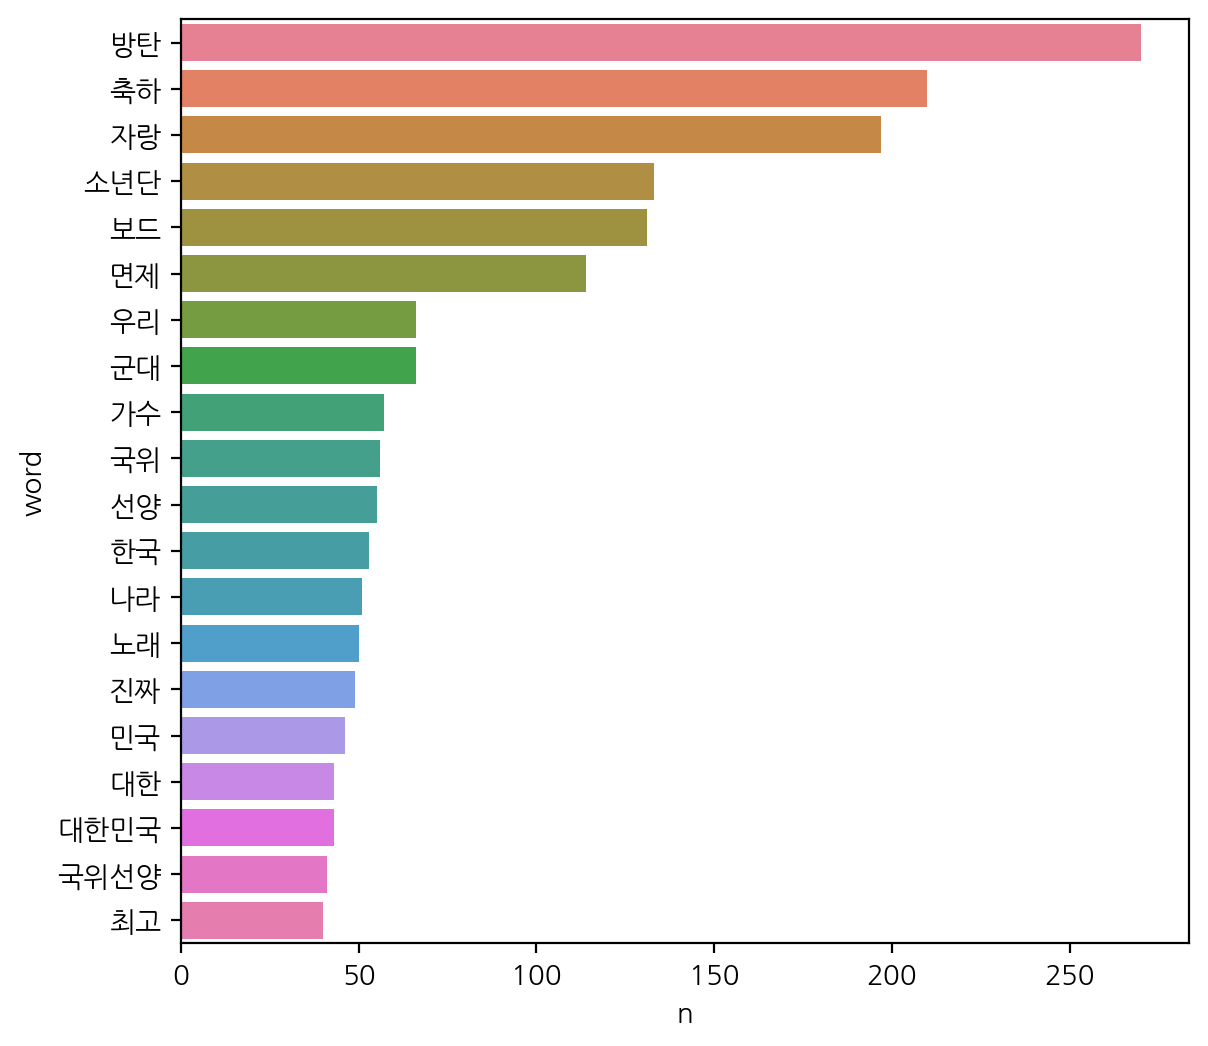

In [99]:
# 가로 세로 크기 설정
plt.rcParams.update({'figure.figsize': [6.5, 6]})

# 막대 그래프 만들기
sns.barplot(data = top20, y = 'word', x = 'n', hue = 'word');

## 워드 클라우드 만글기

In [ ]:
dic_word = df_word.set_index('word').to_dict()['n']

In [100]:
# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = FONT_PATH,       # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)                  # mask 설정

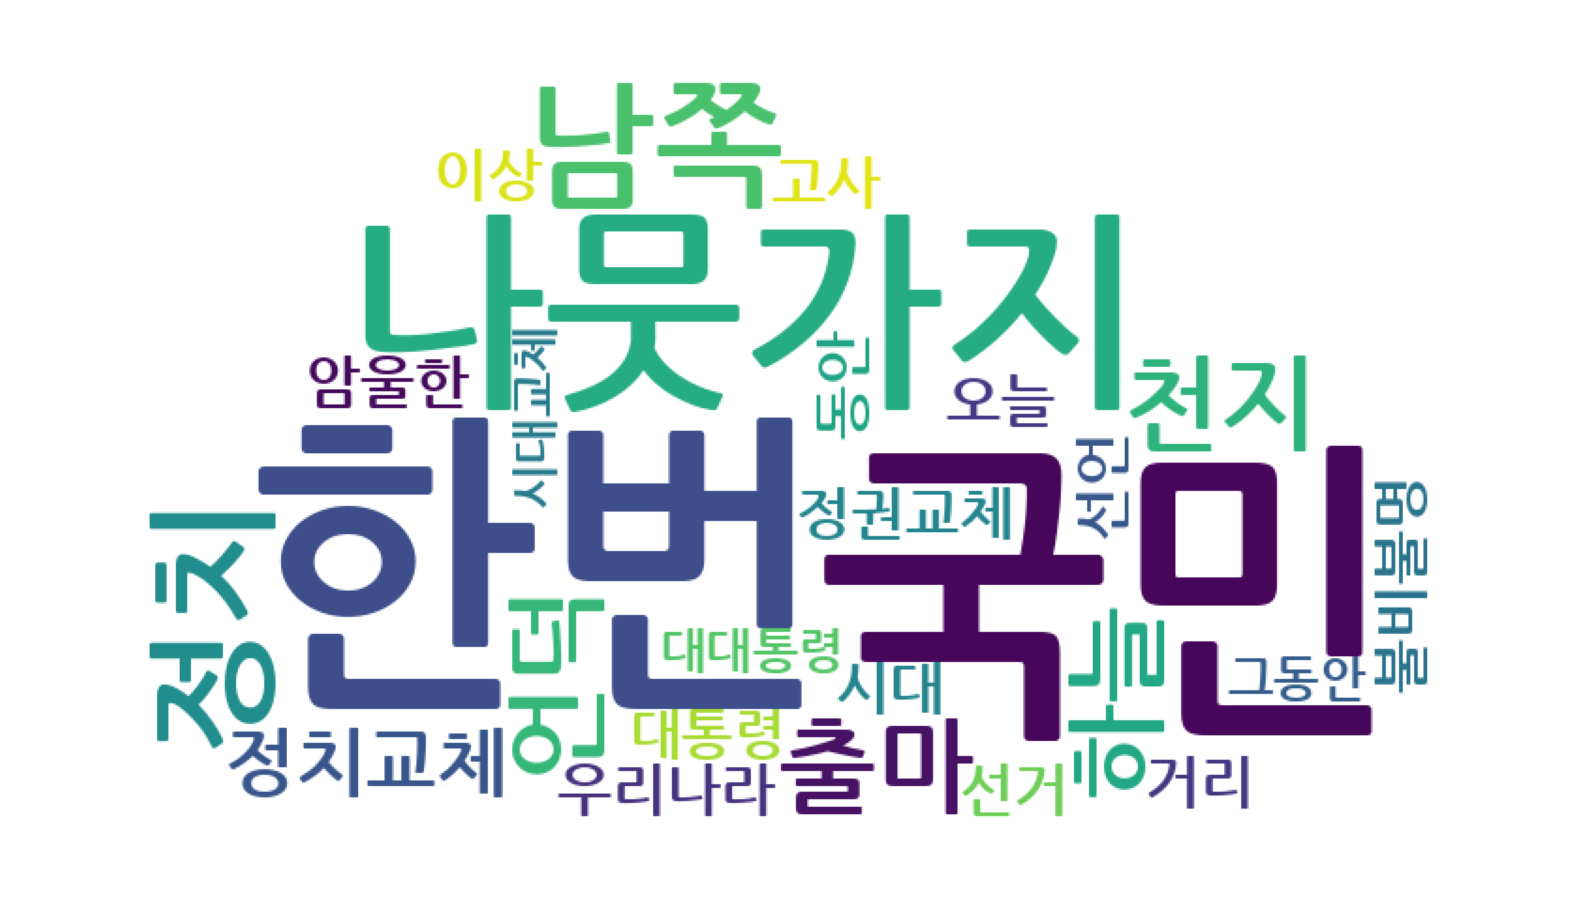

In [101]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud);       # 워드 클라우드 출력